## Linear Regression

### Machine Learning Algorithms division

- Supervised
- Unsupervised
- Reinforcement

Linear regression belongs to `Supervised` MLA. This category is also divided into two groups.

- Regression
    - Simple linear regression
    - Multiple linear regression
    - Polynomial linear regression
- Classification

### Simple Linear Regression (SLR)
In statistics, simple linear regression is a linear regression model with a single explanatory variable. That is, it concerns two-dimensional sample points with one independent variable and one dependent variable (conventionally, the x and y coordinates in a Cartesian coordinate system) and finds a linear function (a non-vertical straight line) that, as accurately as possible, predicts the dependent variable values as a function of the independent variable. The adjective simple refers to the fact that the outcome variable is related to a single predictor.

Consider we have a set of $ n $ data pairs $ {(x_i, y_i): i = 1,\dots, n} $. Next suppose that we can simply describe the relation between $x_i$ and $y_i$ by relation

$$ y_i = \beta\cdot x_i + \alpha + \epsilon_i ,\\ $$

where $ \epsilon_i $ is the error of SLR model. The goal is to find the best values of $ \alpha $ and $ \beta $ that the value of $ \epsilon $ will be minimized.

$$ \epsilon_i = y_i - \beta\cdot x_i - \alpha $$

Lets generate some noisy linear data.

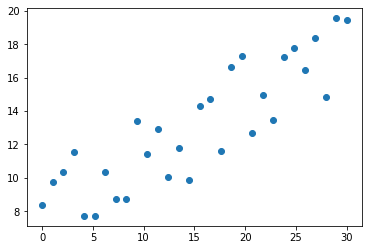

In [24]:
from data_generator import DataGenerator
import matplotlib.pyplot as plt
import numpy as np
import time


[x, y] = DataGenerator.linear_data(slope=0.3, bias=5, start=0, end=30, points=30, noise_rate = 6.5)
plt.scatter(x, y)
plt.show()

Finding the slope $M$ of a regression line reduces to 

$$ M = \frac{\sum_{i = 0}^{N}(x_i - \overline{x})\cdot(y_i - \overline{y})}{\sum_{i=0}^{N}(x_i - \overline{x})^2}, $$

Finding the interceptor is then just

$$ I = \overline{y} - M\cdot\overline{x} \qquad \Rightarrow \qquad R(x)_{regression line} = M\cdot x + I$$



In [67]:

# Create a class Linear regression that will use all of the above

class LinearRegression:
    def __init__(self):
        self.slope = 1
        self.interceptor = 0

    def fit(self, x, y):
        # Mean values
        x_mean = x.mean()
        y_mean = y.mean()
        x_diff = (x - x_mean)
        y_diff = (y - y_mean)

        # Compute slope and interceptor
        slope = (x_diff*y_diff).sum()/(x_diff**2).sum()
        interceptor = y_mean - slope * x_mean 

        # Set slope and interceptor to model
        self.slope = slope
        self.interceptor = interceptor

    def predict(self, x):
        return x*self.slope + self.interceptor

In [101]:
linear_model = LinearRegression()

linear_model.fit(x, y)
print(" Slope: ",linear_model.slope, "\n", "Interceptor: ", linear_model.interceptor, "\n", f"R(x) = {linear_model.slope} * x + {linear_model.interceptor}")

 Slope:  0.30315049805585365 
 Interceptor:  8.493079233879062 
 R(x) = 0.30315049805585365 * x + 8.493079233879062


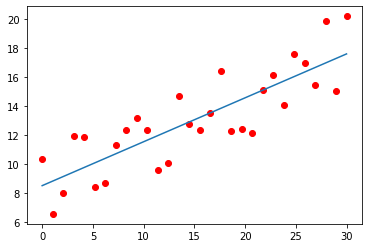

In [102]:
values = np.linspace(0, 30, 40)
prediction = linear_model.predict(values)

plt.plot(values, prediction)
plt.scatter(x, y, c="r")
plt.show()

### Correlation between X and Y and coefficient of determination

- SSR (sum of squares due to regression)
$$ \sum_{i=0}(\hat{y_i} - \overline{y})^2 $$
- SST (total sum of squares)
$$ \sum_{i=0}(y_i - \overline{y})^2 $$
- SSE (sum of squares due to error)
$$ \sum_{i=0}(y_i - \hat{y_i})^2 $$

Coefficient of determination $r^2$ describes how well does the regression line fit the data

$$ r^2 = \frac{SSR}{SST} = \frac{\sum_{i=0}(\hat{y_i} - \overline{y})^2}{\sum_{i=0}(y_i - \overline{y})^2} \qquad \wedge \qquad SSR = SST - SSE $$

Correlation coefficient measures the strength of association between x and y

$$ r_{x,y} = sgn(slope)\cdot\sqrt{r^2} = sgn(M)\cdot \left|{r}\right| $$



In [103]:
sst = ((y - y.mean())**2).sum()
sse = ((y - linear_model.predict(x))**2).sum()
ssr = (sst - sse)

r_2 = ssr/sst 
sign = linear_model.slope/np.abs(linear_model.slope)

r_xy =  sign * np.sqrt(r_2)

print("Linear correlation between x and y is determined as: ", np.round(r_xy, 2), "%")

Linear correlation between x and y is determined as:  0.83 %


In [110]:

# Create a class Linear regression that will use all of the above

class LinearRegression:
    def __init__(self):
        self.slope = 1
        self.interceptor = 0

    def fit(self, x, y):
        # Mean values
        x_mean = x.mean()
        y_mean = y.mean()
        x_diff = (x - x_mean)
        y_diff = (y - y_mean)

        # Compute slope and interceptor
        slope = (x_diff*y_diff).sum()/(x_diff**2).sum()
        interceptor = y_mean - slope * x_mean 

        # Set slope and interceptor to model
        self.slope = slope
        self.interceptor = interceptor

    def predict(self, x):
        return x*self.slope + self.interceptor

    def correlation(self, x, y):
        prediction = self.predict(x)

        sst = ((y - y.mean())**2).sum()
        sse = ((y - prediction)**2).sum()
        ssr = (sst - sse)

        r_2 = ssr/sst 
        sign = self.slope/np.abs(self.slope)

        return np.round(sign * np.sqrt(r_2), 2)

## Let's play with created Class

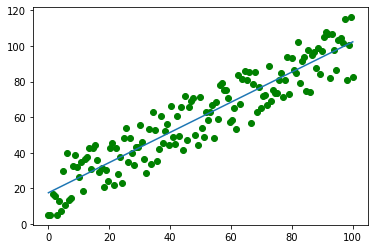

0.93


In [119]:
# Generate noisy linear data
[x, y] = DataGenerator.linear_data(slope=0.8, bias=2, start=0, end=100, points=150, noise_rate = 35.5)

# Create linear regression model
my_model = LinearRegression()

# Train created model
my_model.fit(x, y)

# Plot noisy data and model prediction
plt.plot(x, my_model.predict(x))
plt.scatter(x, y, c="g")
plt.show()

# Find correlation between X and Y (determine how good our aproximation is)
correlation = my_model.correlation(x, y)
print(correlation)

## Linear Regression using Gradient Descent

If we wanna use GD algorithm to optimise the regression line we have to find the error $E$ and then its derivatives with respect to the $m$ and $b$.

$$ E = \sum_{i = 0}^{n} (y_i - m\cdot x - b) $$

$$ \frac{\partial E}{\partial m} = -\frac{2}{n} \sum_{i = 0}^{n} x_i (y_i - m x_i - b) $$
$$ \frac{\partial E}{\partial b} = -\frac{2}{n} \sum_{i = 0}^{n} (y_i - m x_i - b) $$

Now we have to iterate $m$ and $b$ using the gradient as follows

$$ m_{new} = m_{old} - \frac{\partial E}{\partial m} \cdot L_m $$
$$ b_{new} = b_{old} - \frac{\partial E}{\partial b} \cdot L_b, $$

where $L_m$ and $L_b$ corresponds to learning rate for slope and bias respectively. 

In [52]:
def gradient_descent(m_now, b_now, x, y, slope_learn_rate, bias_learn_rate):
    m_grad = 0
    b_grad = 0

    n = len(x)

    for i in range(n):
        m_grad += -(2/n) * x[i] * (y[i] - (m_now * x[i] + b_now))
        b_grad += -(2/n) * (y[i] - (m_now * x[i] + b_now))

    m = m_now - m_grad*slope_learn_rate
    b = b_now - b_grad*bias_learn_rate

    return m, b
    

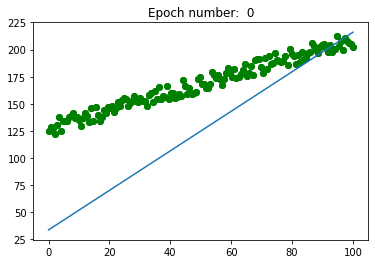

R(x) = 1.82*x + 33.75


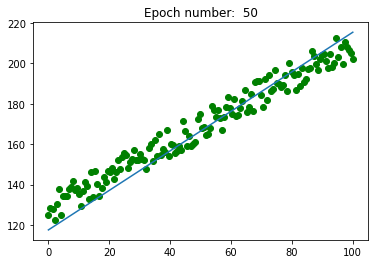

R(x) = 0.98*x + 117.6


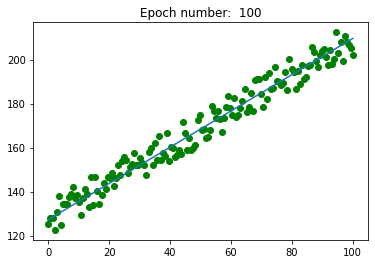

R(x) = 0.82*x + 127.27


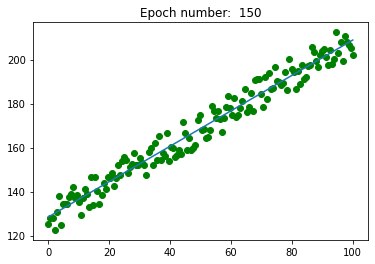

R(x) = 0.8*x + 128.48


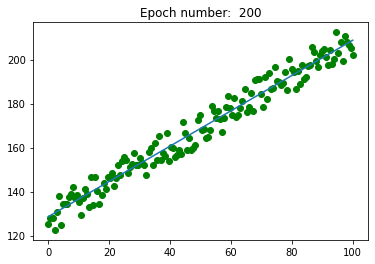

R(x) = 0.8*x + 128.63


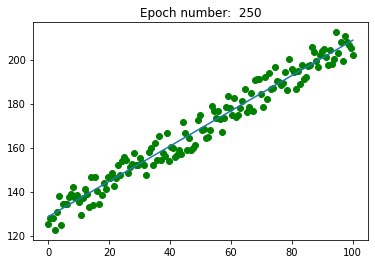

R(x) = 0.8*x + 128.65


In [66]:
# Setup
m = 0
b = 0
L_s = 0.0001
L_b = 0.1
epochs = 300

# Generate noisy linear data
[x, y] = DataGenerator.linear_data(slope=0.82, bias=120, start=0, end=100, points=150, noise_rate = 15.5)
plt.scatter(x, y, c="g")

# Train model using Gradient descent
for i in range(epochs):
    m, b = gradient_descent(m, b, x, y, L_s, L_b)
    if i % 50 == 0:
        plt.plot(x, m*x+b)
        plt.title(f"Epoch number:  {i}")
        plt.scatter(x, y, c="g")
        time.sleep(1)
        plt.show()
        print(f"R(x) = {np.round(m, 2)}*x + {np.round(b, 2)}")


